# LANL Research

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gzip
import shutil
import datetime
import networkx as nx

We neeed to import the data we will use. Below we import the authentication and process summaries.

In [2]:
rootdir = 'C:/Users/corri/OneDrive/Documents/Uni/Postgraduate/Final Project/LANL/ATI Data/Summaries/wls'
unzippeddir = 'C:/Users/corri/OneDrive/Documents/Uni/Postgraduate/Final Project/LANL/ATI Data/Summaries/wls/Unzipped'
frames = []

count = 0

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        filedir = rootdir + '/' + file
        with gzip.open(filedir) as f:
            df = pd.read_csv(filedir, header=None)
            frames.append(df)
        if 'authentications' in str(file):
            count = count + len(df)

df = pd.concat(frames)

In [3]:
df

0           1                    2             3  4      5
0        User035855  Comp808475           Comp081330           TGS  0   17.0
1       Comp655251$  Comp655251      ActiveDirectory  NetworkLogon  0  350.0
2        User762066  Comp306129      ActiveDirectory           TGS  0   22.0
3        User384215  Comp095190  EnterpriseAppServer  NetworkLogon  0   35.0
4        User043263  Comp883307           Comp384394           TGS  0    2.0
...             ...         ...                  ...           ... ..    ...
251545  Comp738970$  Comp738970       Proc207472.exe       svchost  2    NaN
251546   User925794  Comp097857              cmd.exe    Proc174492  2    NaN
251547  Comp996714$  Comp996714       Proc612297.exe      services  5    NaN
251548  Comp391736$  Comp391736         rundll32.exe    Proc247259  2    NaN
251549  Comp769777$  Comp769777         rundll32.exe      rundll32  3    NaN

[72720575 rows x 6 columns]

In [4]:
authentication_data = df[:count]

In [5]:
process_data = df[count:]

In [6]:
authentication_data

0           1                    2             3  4      5
0       User035855  Comp808475           Comp081330           TGS  0   17.0
1      Comp655251$  Comp655251      ActiveDirectory  NetworkLogon  0  350.0
2       User762066  Comp306129      ActiveDirectory           TGS  0   22.0
3       User384215  Comp095190  EnterpriseAppServer  NetworkLogon  0   35.0
4       User043263  Comp883307           Comp384394           TGS  0    2.0
...            ...         ...                  ...           ... ..    ...
80187  Comp955366$  Comp955366      ActiveDirectory           TGS  0   23.0
80188  Comp589380$  Comp589380      ActiveDirectory           TGT  0   37.0
80189  Comp629793$  Comp629793      ActiveDirectory           TGS  0   21.0
80190   User104387  Comp917362      ActiveDirectory  NetworkLogon  0  387.0
80191   User992201  Comp487027           Comp915658  NetworkLogon  0    1.0

[16133744 rows x 6 columns]

In [7]:
process_data

0           1               2           3  4   5
0       Comp748297$  Comp748297  Proc391839.exe  Proc387473  1 NaN
1       Comp563664$  Comp563664    rundll32.exe    services  1 NaN
2        User607396  Comp609111  Proc417435.exe  Proc417435  1 NaN
3       Comp641702$  Comp641702  Proc249569.exe    services  1 NaN
4       Comp157389$  Comp157389  Proc402696.exe    services  1 NaN
...             ...         ...             ...         ... ..  ..
251545  Comp738970$  Comp738970  Proc207472.exe     svchost  2 NaN
251546   User925794  Comp097857         cmd.exe  Proc174492  2 NaN
251547  Comp996714$  Comp996714  Proc612297.exe    services  5 NaN
251548  Comp391736$  Comp391736    rundll32.exe  Proc247259  2 NaN
251549  Comp769777$  Comp769777    rundll32.exe    rundll32  3 NaN

[56586831 rows x 6 columns]

In [20]:
def draw_day(data,i):

    # split the data into the selected time period
    df_day = data

    # print day we're working on
    print(i)

    # get all unqiue users for that period
    userlist_1 = list(list(df_day[0].unique()))
    userlist_2 = list(list(df_day[1].unique()))
    unique_users = set(userlist_1 + userlist_2)

    # get all connections made for that period
    connections = zip(df_day[0], df_day[1])

    # create the graph
    G = nx.DiGraph()

    # create the nodes of the graph
    for u in unique_users:
        G.add_node(u)

    # create the edges of the graph
    for a in connections:
        G.add_edge(*a)

    # draw the network
    plt.figure(figsize=(15,15), dpi=400)
    nx.draw(G, node_size=20, linewidths=0.8)
    plt.savefig('day {}.png'.format(i))

    return G

In [21]:
index_list = authentication_data.index.tolist()
start_days = [i for i, e in enumerate(index_list) if e == 0]
start_days.append(len(authentication_data))

data_ = [(authentication_data[start_days[i]:start_days[i+1]],i) for i in range(len(start_days)-1)]

0
Finished creating networks!
0:24:49.877367


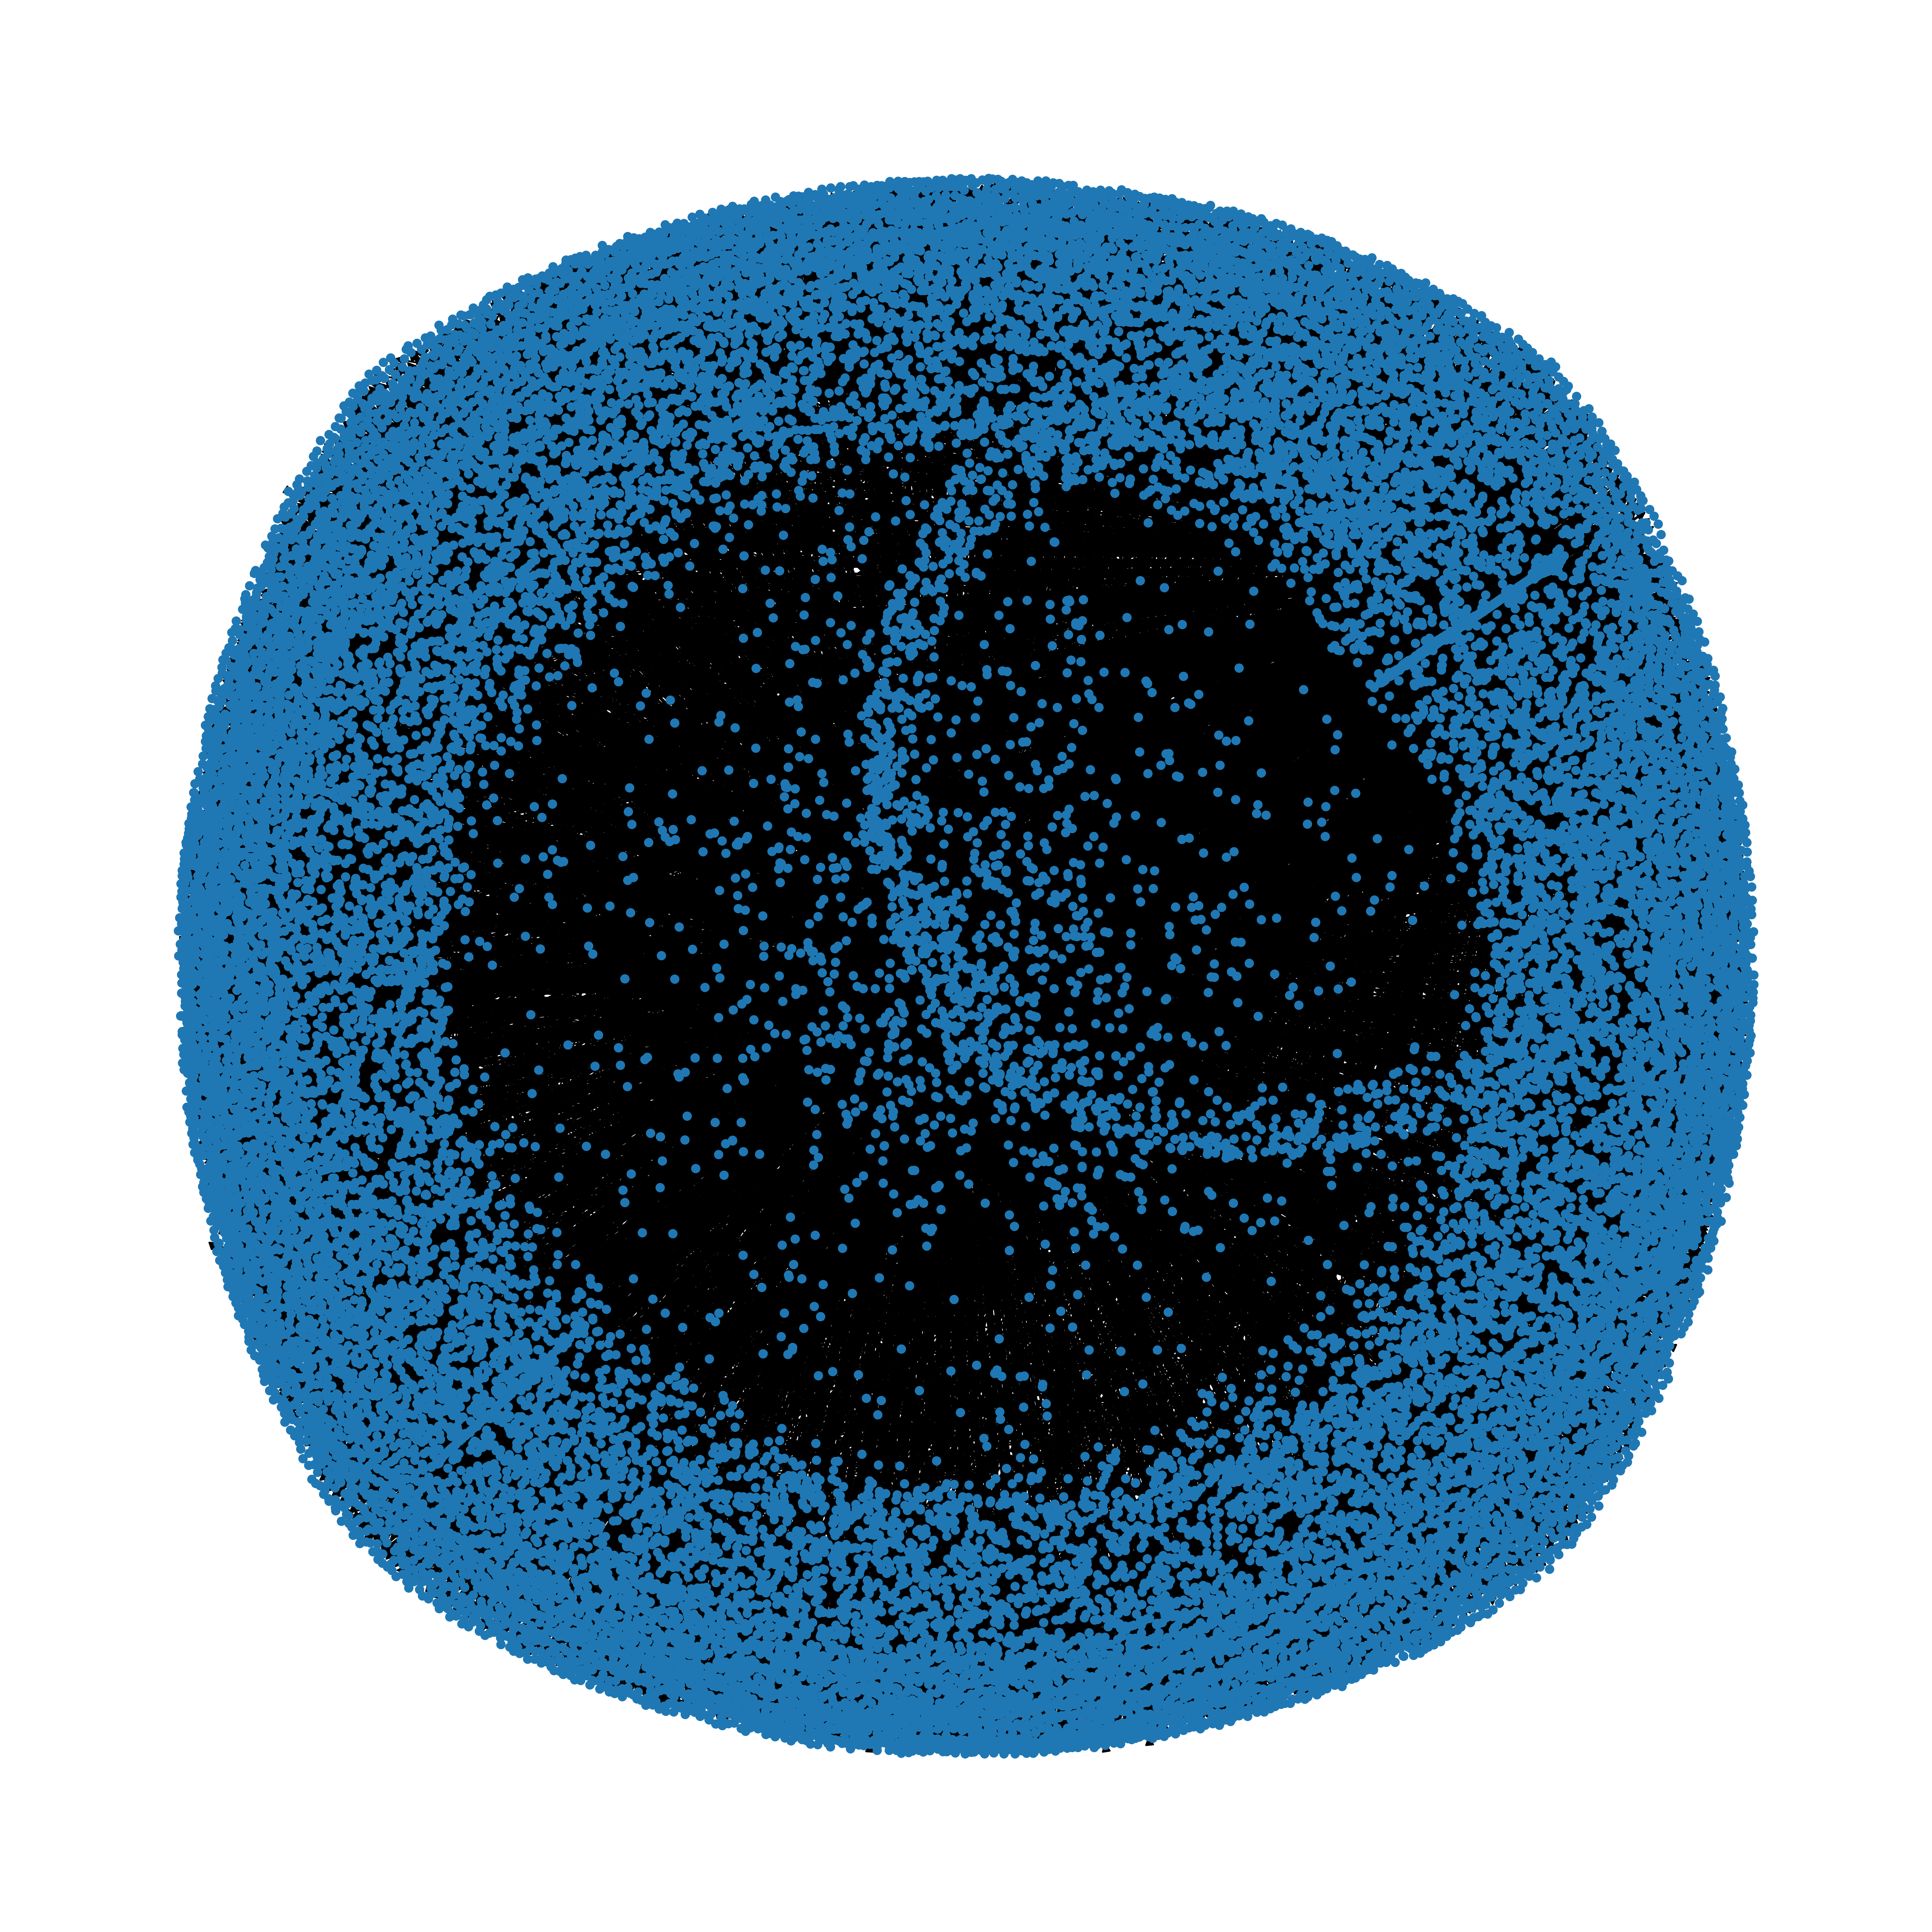

In [22]:
begin_time = datetime.datetime.now()
draw_day(data_[0][0], data_[0][1])
print("Finished creating networks!")
end_time = datetime.datetime.now()
print(end_time - begin_time)

Creating a single network takes about 23 minutes. We do this for all 91 days so this is a large process which takes multiple hours so I would not recommend running the below line of code since this has parallelised this process for 8 cores but will still take hours.

In [34]:
# %run -i Parallelised-Drawing.py

In [32]:
path = 'C:/Users/corri/Downloads'
df_netflow = pd.read_csv(path + '/netflow_day-02.bz2', header=None)

In [40]:
headers = (['Time', 'Duration', 'SrcDevice', 'DstDevice', 'Protocol',
            'SrcPort', 'DstPort', 'SrcPackets', 'DstPackets', 'SrcBytes', 'DstBytes'])
df_netflow.columns = headers

In [41]:
df_netflow

Time  Duration   SrcDevice        DstDevice  Protocol    SrcPort  \
0          118781      5580  Comp364445       Comp547245        17  Port05507   
1          118783      6976  Comp450942       Comp829338         6  Port03137   
2          118785     14178    IP564116       Comp141988        17       5060   
3          118785     28147    IP564116       Comp141988        17       5060   
4          118785     48507    IP564116       Comp141988        17       5060   
...           ...       ...         ...              ...       ...        ...   
115949431  172799     16505  Comp059508  ActiveDirectory         6  Port78245   
115949432  172799     27496  Comp059508  ActiveDirectory         6  Port78245   
115949433  172799     27548  Comp107130       Comp097048         6  Port05132   
115949434  172799     42747  Comp107130       Comp097048         6  Port05132   
115949435  172799     50343  Comp107130       Comp097048         6  Port05132   

             DstPort  SrcPackets  DstPackets  SrcBytes    DstBytes  
0          Port46272           0      755065         0  1042329018  
1                445        1665        1108    300810      250408  
2               5060        1866           0   1477041           0  
3               5060        3326           0   2656305           0  
4               5060        5423           0   4388449           0  
...              ...         ...         ...       ...         ...  
115949431  Port08664        7958           0   8182300           0  
115949432  Port08664       22893           0  22709439           0  
115949433        443         895         420    105478       29578  
115949434        443        1381         682    154756       41630  
115949435        443        1582         787    175130       46460  

[115949436 rows x 11 columns]

In [46]:
src_device_counts = df_netflow.groupby('SrcDevice').size().sort_values(ascending=False)

In [47]:
src_device_counts.index

Index(['Comp030334', 'Comp257274', 'Comp866402', 'Comp965575', 'Comp296454',
       'Comp623258', 'Comp073202', 'Comp044772', 'Comp107130',
       'EnterpriseAppServer',
       ...
       'Comp009817', 'Comp999861', 'Comp195048', 'Comp365650', 'Comp765681',
       'IP011225', 'Comp364995', 'IP015011', 'Comp521508', 'Comp198242'],
      dtype='object', name='SrcDevice', length=25847)

In [52]:
src_device_20l = src_device_counts.nlargest(20)

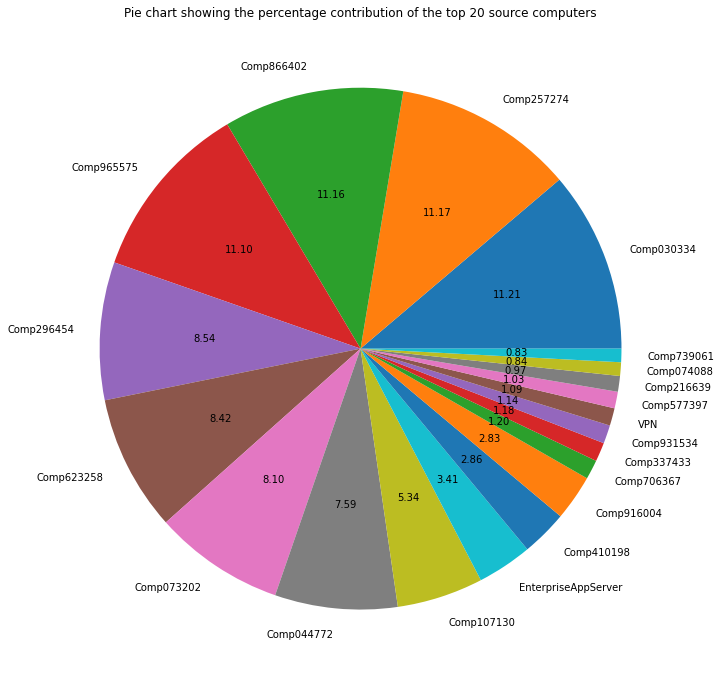

In [62]:
plt.figure(figsize=(12,12))
plt.pie(src_device_20l, labels=src_device_20l.index, autopct = '%.2f')
plt.title('Pie chart showing the percentage contribution of the top 20 source computers')
plt.show()

### Time

MemoryError: Unable to allocate 885. MiB for an array with shape (115949436,) and data type int64

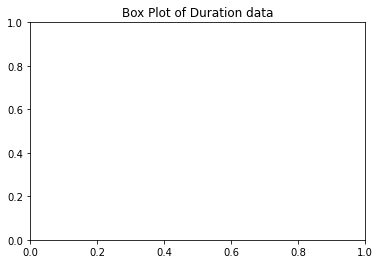

In [68]:
duration_data = df_netflow['Duration']
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Duration data')
ax1.boxplot(duration_data)

In [73]:
dur_mean = df_netflow['Duration'].mean()
dur_75 = np.percentile(df_netflow['Duration'], 75)
dur_25 = np.percentile(df_n)

52712.94770658479